In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [35]:
df=df.iloc[:,[2,3,4]]

In [36]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Train test split

In [41]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(df[['Age','EstimatedSalary']],df['Purchased'],test_size=0.3,random_state=0)

In [42]:
x_te

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_tr)
x_tr_sca=scaler.transform(x_tr)
x_te_sca=scaler.transform(x_te)

In [49]:
x_tr_sca=pd.DataFrame(x_tr_sca,columns=x_tr.columns)
x_te_sca=pd.DataFrame(x_te_sca,columns=x_te.columns)

In [50]:
x_tr_sca

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [51]:
np.round(x_tr.describe(),1)


,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [52]:
np.round(x_tr_sca.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'After Scaling')

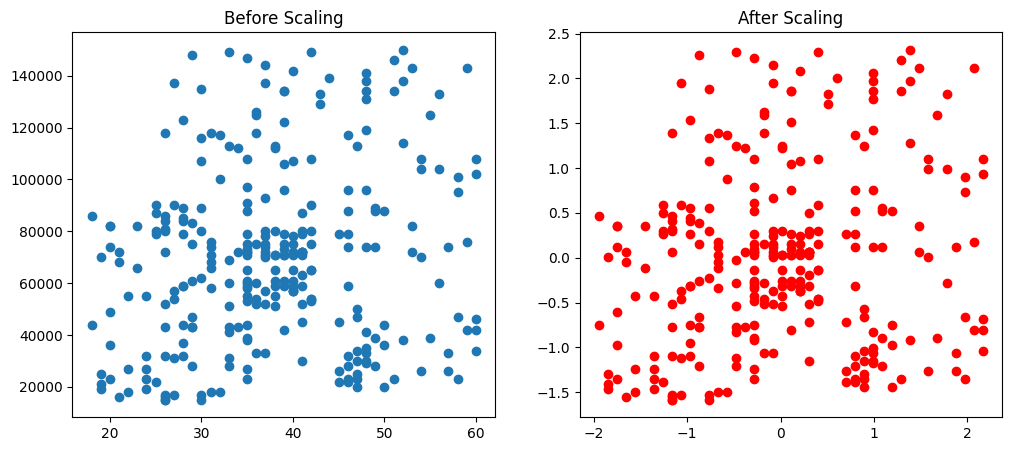

In [58]:
fig,(plt1,plt2)=plt.subplots(ncols=2,figsize=(12,5))

plt1.scatter(x='Age',y='EstimatedSalary',data=x_tr)
plt1.set_title('Before Scaling')
plt2.scatter(x='Age',y='EstimatedSalary',data=x_tr_sca,color='red')
plt2.set_title('After Scaling')

Text(0.5, 1.0, 'After Scaling')

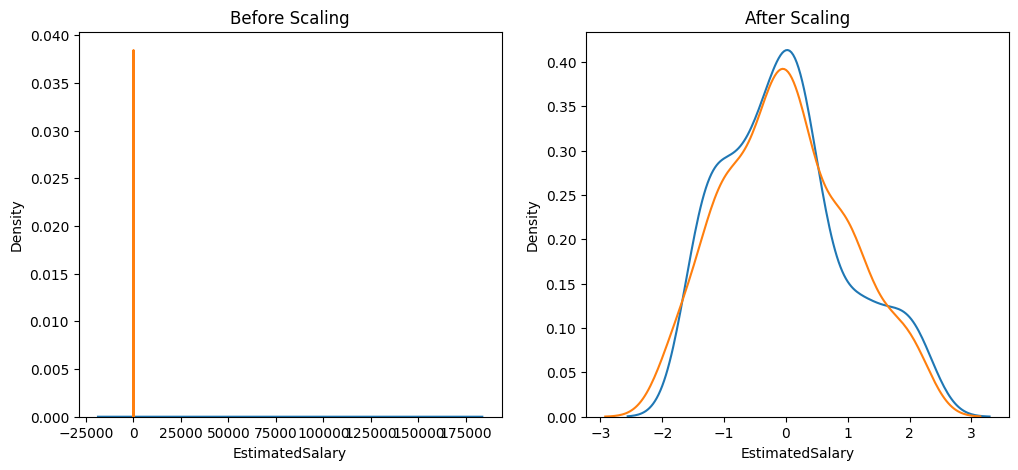

In [63]:
fig,(plt1,plt2)=plt.subplots(ncols=2,figsize=(12,5))
plt1.set_title('Before Scaling')
sns.kdeplot(x_tr['EstimatedSalary'],ax=plt1)
sns.kdeplot(x_tr['Age'],ax=plt1)


sns.kdeplot(x_tr_sca['EstimatedSalary'], ax=plt2)
sns.kdeplot(x_tr_sca['Age'], ax=plt2)
plt2.set_title('After Scaling')